In [5]:
# Import all the Dependincies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [17]:
# Data Collection and analysis
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance (1).csv


In [7]:
# Load the csv dataset into a pandas dataframe
insurance_dataset = pd.read_csv("insurance.csv")

In [8]:
# Display the first fiverows of a dataset
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
# Find the number of rows and columns
insurance_dataset.shape

(1338, 7)

In [10]:
# Getting some information about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
# We three categorical features
# 1 whether a person is a smoker or non-smoker (smoker)
# 2 whether the person is male or female (sex)
# 3 The region
# Charges is the target variable


In [12]:
# Checking for missing values
insurance_dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [13]:
# Data Analysis
# Statistical measures about the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-14-2e9101a5988b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


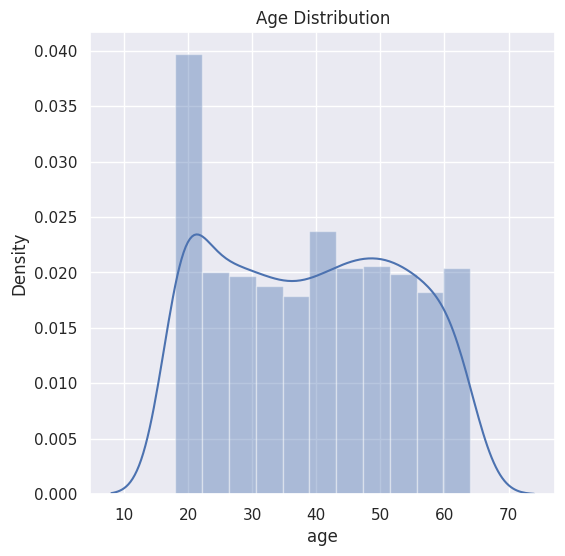

In [14]:
# Find the distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

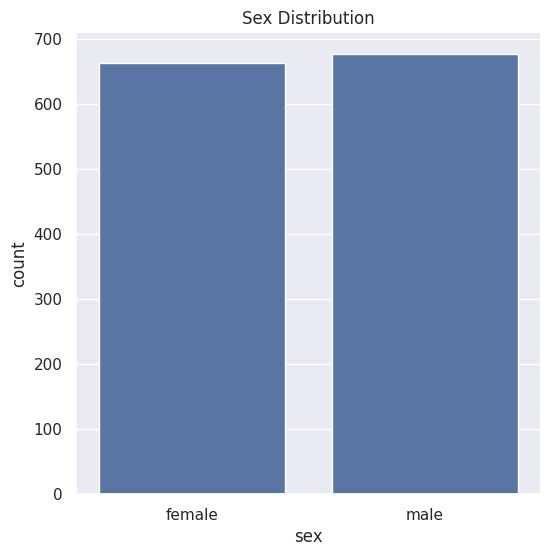

In [20]:
# Finding the distribution for gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title("Sex Distribution")
plt.show()

In [21]:
insurance_dataset['sex'].value_counts() -# Checking values for the gender and howit is distributed

,count
sex,
male,676
female,662


<ipython-input-23-5572a4a62209>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


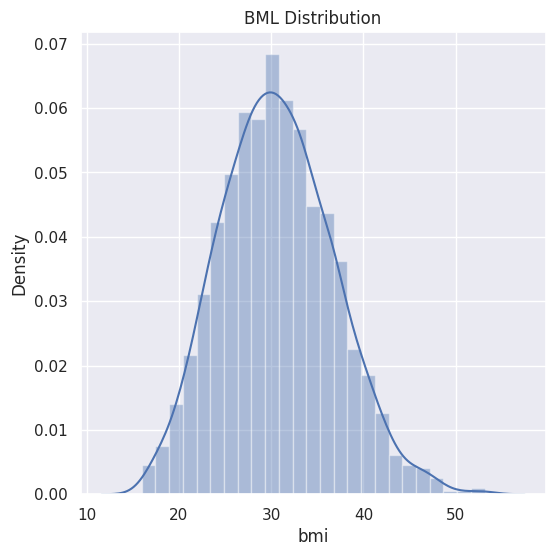

In [23]:
# Finding the distribution of the BMI
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BML Distribution')
plt.show()

In [24]:
# Normal BMI range for a person is 18,5-24,9
# if bml< 18,5 - person is underweight
# if bmi is > 24,9 - person is overweight
# Based on the grapgh above, a lot of people are overweight this can influence the insurance cost a person get. It might increase the insurance cost.

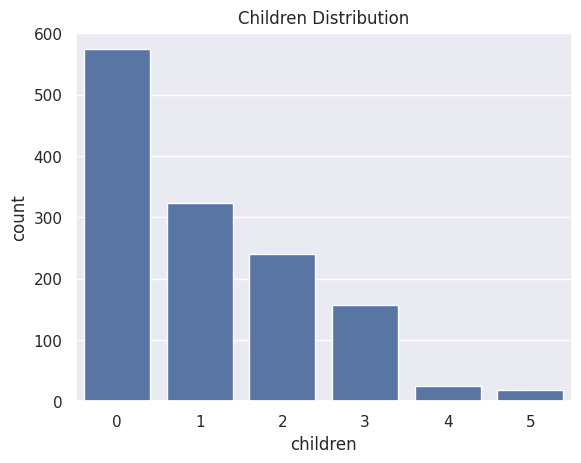

In [25]:
# Use count plof for finding the distribution of the Children column
plt.Figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children Distribution')
plt.show()

In [26]:
# Find the number of the Children using value counts
insurance_dataset['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


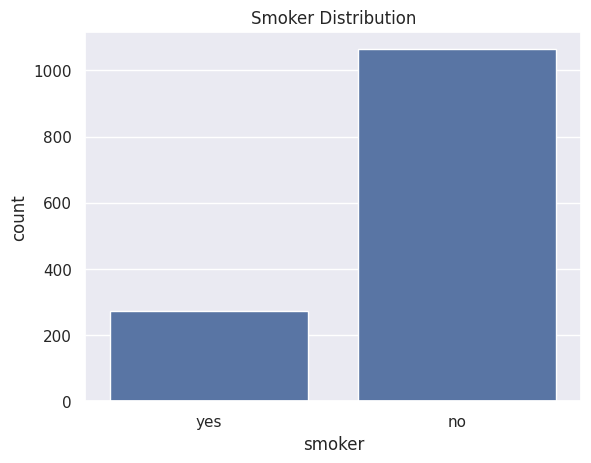

In [28]:
# Finding the distribution for the smoker column
plt.Figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('Smoker Distribution')
plt.show()

In [30]:
insurance_dataset['smoker'].value_counts() - # the numerical value of the distribution of the smoker column

,count
smoker,
no,1064
yes,274


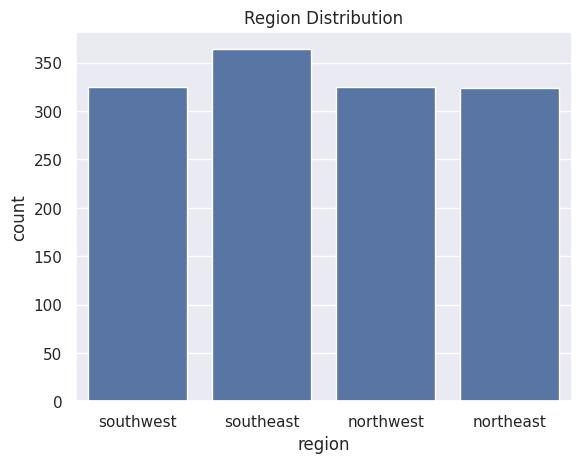

In [33]:
# Finding the distribution of the regions column
plt.Figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('Region Distribution')
plt.show()

In [35]:
insurance_dataset['region'].value_counts() # the numerical value of the column region

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


<ipython-input-37-3b6775a2176c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


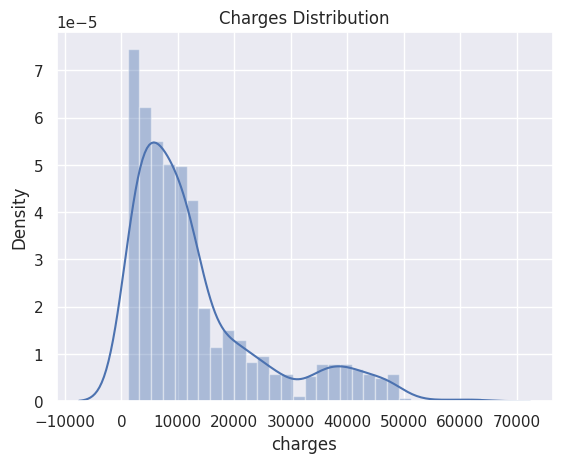

In [37]:
# Finding the distribution for the charges using distribution plot
plt.Figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

In [40]:

# Data Preprocessing

# Encoding the categorical features

# encoding the sex column
insurance_dataset.replace({'sex':{'male':0, 'female':1}}, inplace=True)

# Encoding the smoker column
insurance_dataset.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

# Encoding the region column
insurance_dataset.replace({'region':{'southwest':0, 'northwest':1,'southeast':2, 'northeast':3}}, inplace=True)

<ipython-input-40-05afef55c299>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex':{'male':0, 'female':1}}, inplace=True)
<ipython-input-40-05afef55c299>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)
<ipython-input-40-05afef55c299>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to

In [41]:
print(insurance_dataset)

      age  sex     bmi  children  smoker  region      charges
0      19    1  27.900         0       0       0  16884.92400
1      18    0  33.770         1       1       2   1725.55230
2      28    0  33.000         3       1       2   4449.46200
3      33    0  22.705         0       1       1  21984.47061
4      32    0  28.880         0       1       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    0  30.970         3       1       1  10600.54830
1334   18    1  31.920         0       1       3   2205.98080
1335   18    1  36.850         0       1       2   1629.83350
1336   21    1  25.800         0       1       0   2007.94500
1337   61    1  29.070         0       0       1  29141.36030

[1338 rows x 7 columns]


In [44]:
# We have to split the features and target
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       0
1      18    0  33.770         1       1       2
2      28    0  33.000         3       1       2
3      33    0  22.705         0       1       1
4      32    0  28.880         0       1       1
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       1
1334   18    1  31.920         0       1       3
1335   18    1  36.850         0       1       2
1336   21    1  25.800         0       1       0
1337   61    1  29.070         0       0       1

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [45]:
# Split the data into training data and testing data
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size =0.2, random_state =2)

In [46]:
# Print the shape of this dataset
print(X.shape,X_train,X_test.shape)

(1338, 6)       age  sex     bmi  children  smoker  region
882    21    1  22.135         0       1       3
505    37    0  30.875         3       1       1
798    58    1  33.100         0       1       0
792    22    1  23.180         0       1       3
201    48    1  32.230         1       1       2
...   ...  ...     ...       ...     ...     ...
466    60    1  28.700         1       1       0
299    48    1  28.880         1       1       1
493    61    0  43.400         0       1       0
527    51    1  25.800         1       1       0
1192   58    1  32.395         1       1       3

[1070 rows x 6 columns] (268, 6)


In [47]:
# Model training
# Using linear regression model
# Loading the linear regression model
regressor = LinearRegression()

In [48]:
# Fit the model into X & Y
regressor.fit(X_train,Y_train)

LinearRegression()

In [49]:
# Model Evaluation
# Use R squared
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [51]:
# Finding the r squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value:',r2_train)

R squared value: 0.751618558520502


In [52]:
# R 2 squared is closer to 1 which means the model performed well.

In [53]:
# Finding the r squared value on test data

test_data_prediction = regressor.predict(X_test)
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value:', r2_test)

R squared value: 0.7428748503048913


In [ ]:
# Similiar to the score obtained on training data- this means the model did well.